# Aufgabe 2: Optimizing Deep Learning Model
In diesem Notebook besprechen wir die Optimierung eines Modells

## LOADING PACKAGES

In [213]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
matplotlib.get_backend()

%run Common_Experiment_Functions.ipynb

## LOADING DATA

In [119]:
%matplotlib inline
matplotlib.get_backend()

from keras.datasets import boston_housing

# load dataset
(x_train, y_train),(x_test, y_test) = boston_housing.load_data()

### Scaling the values

Scalierung des Trainingdatensatzes wird immer auch auf die Testdatensatz angewandt. Dies ist sehr wichtig!!!

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [121]:
print("Shape x_train: {}".format(x_train.shape))
print("Shape x_test: {}".format(x_test.shape))

Shape x_train: (404, 13)
Shape x_test: (102, 13)


In [122]:
# save each number as one-hot category
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## OPTIMIZING DEEP LEARNING MODEL


### Optimizing Batch Size

In [123]:
#Initialize the measures
accuracy_measures = {}

for batch_size in range(16,128,16):

    #Load default configuration
    model_config = base_model_config()

    model_config["EPOCHS"]=30

    model_config["BATCH_SIZE"] = batch_size
    model_name = "Batch-Size-" + str(batch_size)
    history, model=create_and_run_model(model_config,x_train,y_train,model_name)

    accuracy_measures[model_name] = history.history["mae"]


******************************************************
Model: "Batch-Size-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 12)                168       
                                                                 
 Dense-Layer-1 (Dense)       (None, 8)                 104       
                                                                 
 Output-Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Batch-Size-32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 12)             

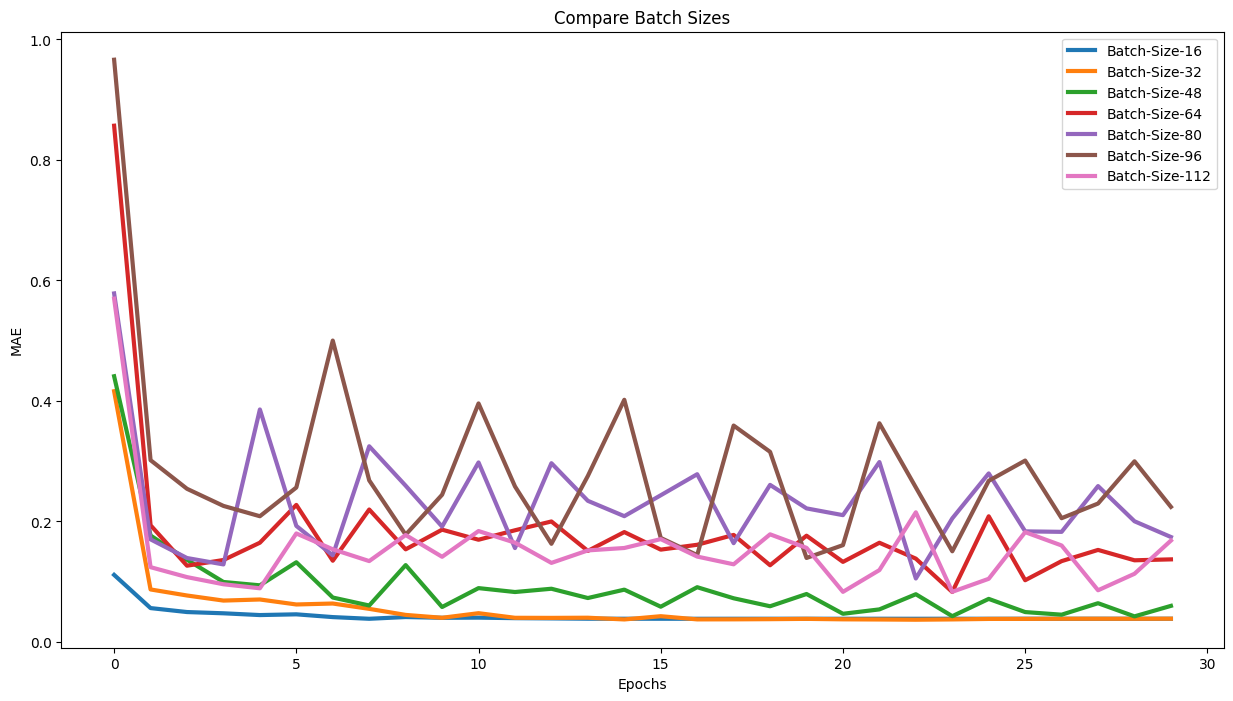

In [124]:
plot_graph(accuracy_measures, "Compare Batch Sizes")

### Optimizing the number of hidden layers

In [126]:
accuracy_measures = {}
layer_list =[]
for layer_count in range(1,6): # Füge bis zu fünf Hiddenlayer dazu.

    #12 nodes in each layer
    layer_list.append(12)

    model_config = base_model_config()

    model_config["EPOCHS"]=20
    model_config["BATCH_SIZE"] = 16

    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Layers-" + str(layer_count)
    history, model=create_and_run_model(model_config,x_train,y_train,model_name)

    accuracy_measures[model_name] = history.history["mae"]




******************************************************
Model: "Layers-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 12)                168       
                                                                 
 Output-Layer (Dense)        (None, 1)                 13        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Layers-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 12)                168       
                                                                 
 Dense-Layer-1 (Dense)       (None, 12)                156    

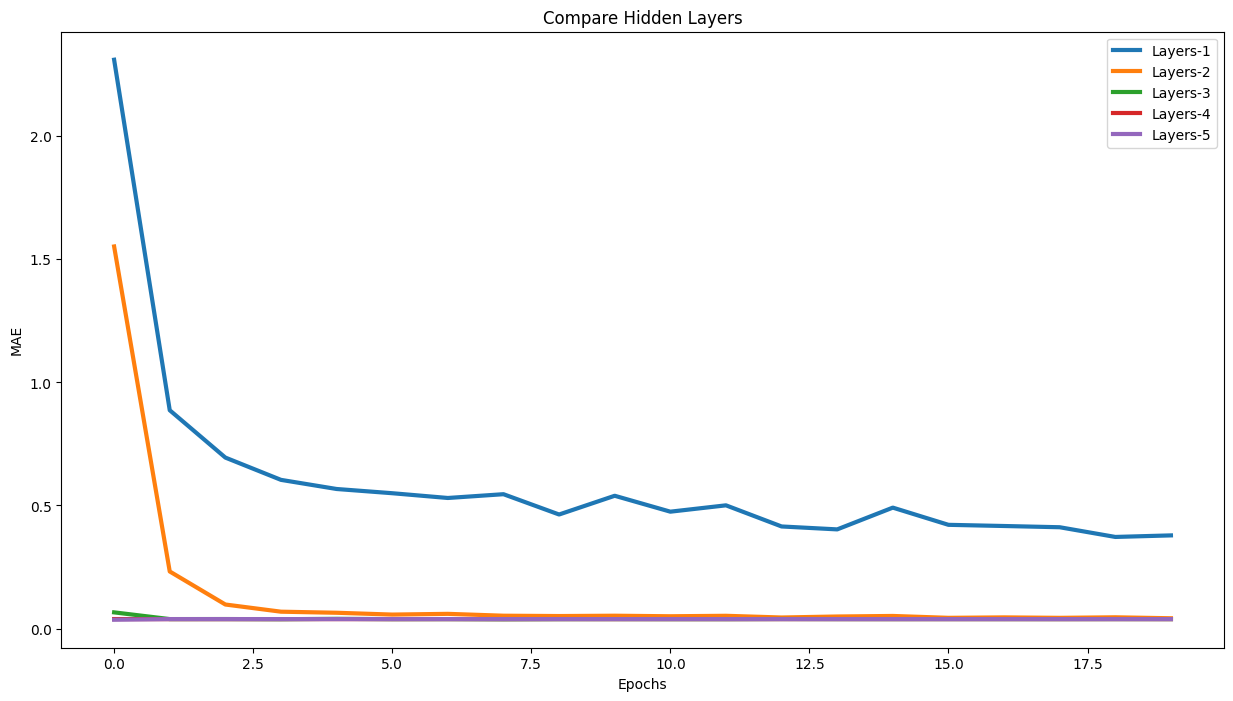

In [127]:
plot_graph(accuracy_measures, "Compare Hidden Layers")

### Optimizing number of hidden nodes

In [145]:
accuracy_measures = {}

node_increment=2

for node_count in range(1,7):

    #Anzahl Hidden Layers in Klammer hier 3 Layers (also Range 4), da oben gutes Resultat erzeugt
    layer_list =[]
    for layer_count in range(3):
        layer_list.append(node_count * node_increment)

    model_config = base_model_config()

    model_config["EPOCHS"]=20
    model_config["BATCH_SIZE"] = 16

    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Nodes-" + str(node_count * node_increment)
    history, model=create_and_run_model(model_config,x_train,y_train, model_name)

    accuracy_measures[model_name] = history.history["mae"]


******************************************************
Model: "Nodes-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 2)                 28        
                                                                 
 Dense-Layer-1 (Dense)       (None, 2)                 6         
                                                                 
 Dense-Layer-2 (Dense)       (None, 2)                 6         
                                                                 
 Output-Layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Nodes-4"
_________________________________________________________________


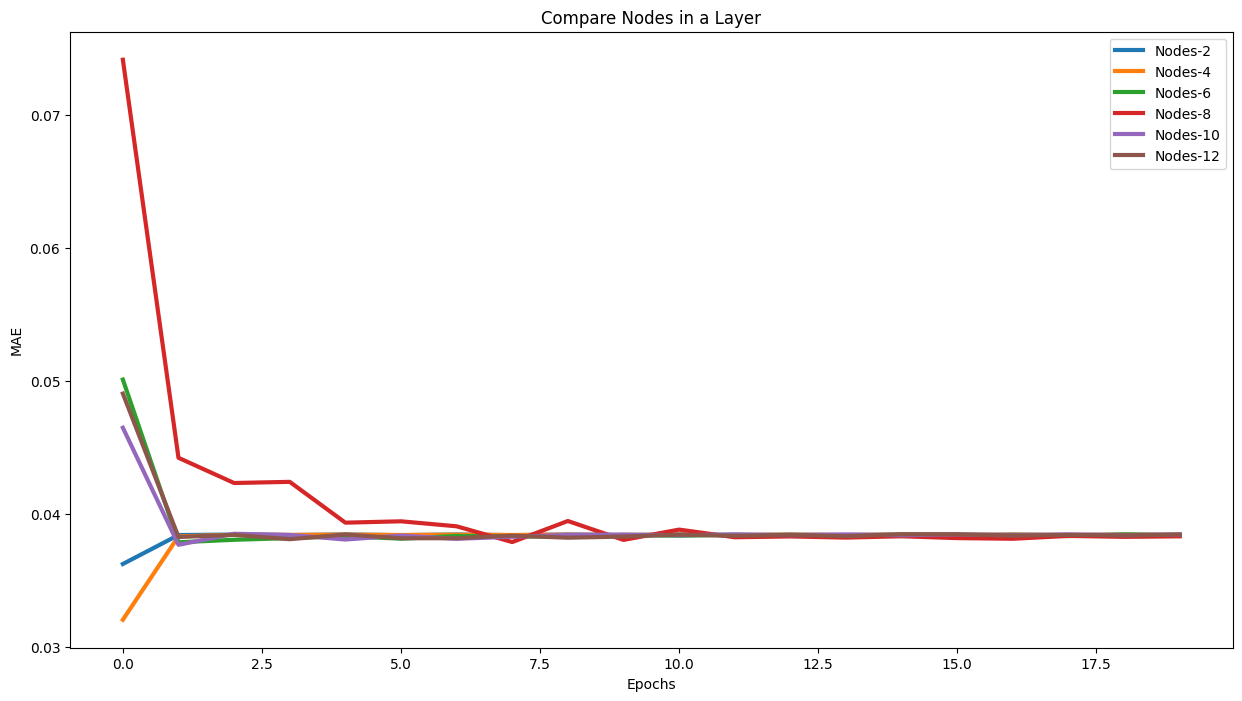

In [146]:
plot_graph(accuracy_measures, "Compare Nodes in a Layer")

### Optimizing Activation Function

In [148]:
accuracy_measures = {}

activation_list = ['relu','sigmoid','tanh']

for activation in activation_list:

    model_config = base_model_config()

    model_config["EPOCHS"]=20
    model_config["BATCH_SIZE"] = 16
    model_config["HIDDEN_NODES"] = [6,6] # gibt auch die Anzahl Hidden Layers an

    model_config["HIDDEN_ACTIVATION"] = activation
    model_name = "Model-" + activation
    history, model=create_and_run_model(model_config,x_train,y_train,model_name)

    accuracy_measures["Model-" + activation] = history.history["mae"]


******************************************************
Model: "Model-relu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)                 84        
                                                                 
 Dense-Layer-1 (Dense)       (None, 6)                 42        
                                                                 
 Output-Layer (Dense)        (None, 1)                 7         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Model-sigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)                 

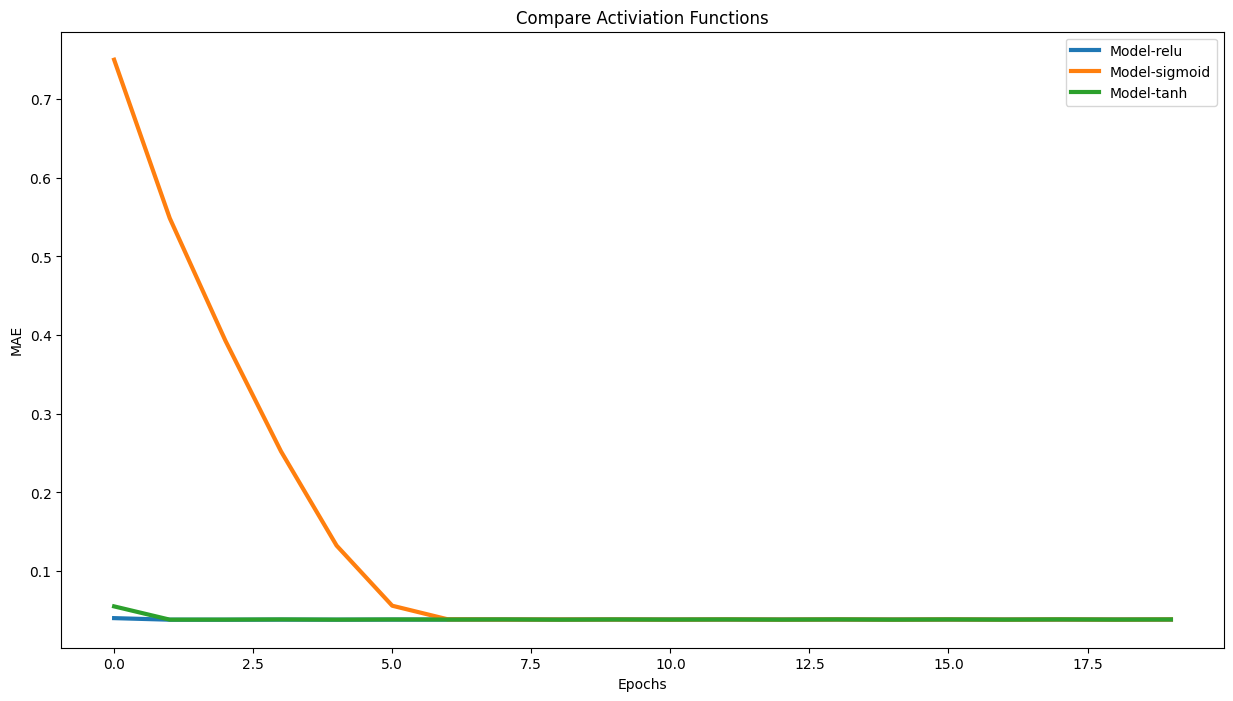

In [149]:
plot_graph(accuracy_measures, "Compare Activiation Functions")

### Optimizing Initializing Weigths

In [155]:
accuracy_measures = {}

initializer_list = ['random_normal','zeros','ones','random_uniform']
for initializer in initializer_list:

    model_config = base_model_config()

    model_config["EPOCHS"]=20
    model_config["BATCH_SIZE"] = 16
    model_config["HIDDEN_NODES"] = [6,6] # gibt auch die Anzahl Hidden Layers an
    model_config["HIDDEN_ACTIVATION"] = 'relu'

    model_config["WEIGHTS_INITIALIZER"] = initializer
    model_name = "Model-" + initializer
    history, model=create_and_run_model(model_config,x_train,y_train, model_name)

    accuracy_measures[model_name] = history.history["mae"]


******************************************************
Model: "Model-random_normal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)                 84        
                                                                 
 Dense-Layer-1 (Dense)       (None, 6)                 42        
                                                                 
 Output-Layer (Dense)        (None, 1)                 7         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Model-zeros"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)          

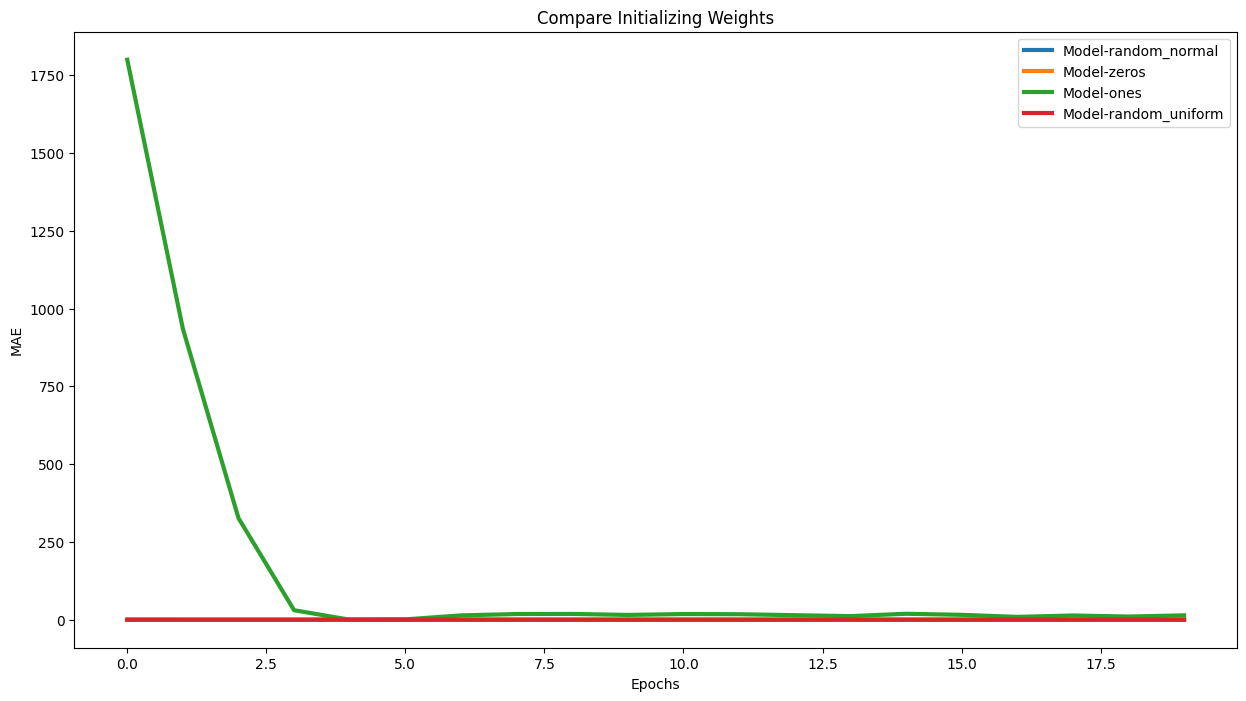

In [156]:
plot_graph(accuracy_measures, "Compare Initializing Weights")

## Optimizing Back Propagation

### Optimizing Optimizers

In [158]:
accuracy_measures = {}

optimizer_list = ['sgd','rmsprop','adam','adagrad']
for optimizer in optimizer_list:

    model_config = base_model_config()

    model_config["EPOCHS"]=20
    model_config["BATCH_SIZE"] = 16
    model_config["HIDDEN_NODES"] = [6,6] # gibt auch die Anzahl Hidden Layers an
    model_config["HIDDEN_ACTIVATION"] = 'relu'
    model_config["WEIGHTS_INITIALIZER"] = 'random_normal'

    model_config["OPTIMIZER"] = optimizer
    model_name = "Optimizer-" + optimizer
    history, model=create_and_run_model(model_config,x_train,y_train, model_name)

    accuracy_measures[model_name] = history.history["mae"]


******************************************************
Model: "Optimizer-sgd"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)                 84        
                                                                 
 Dense-Layer-1 (Dense)       (None, 6)                 42        
                                                                 
 Output-Layer (Dense)        (None, 1)                 7         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Optimizer-rmsprop"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)          

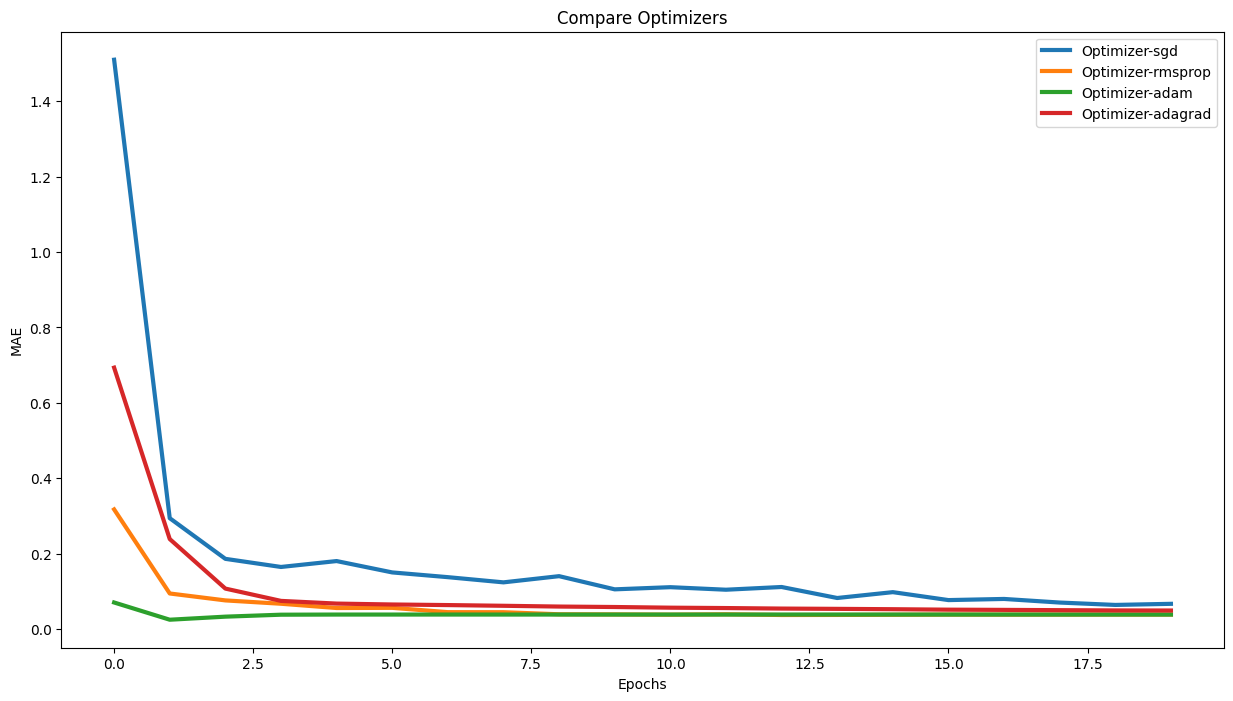

In [159]:
plot_graph(accuracy_measures, "Compare Optimizers")

### Optimizing Learning Rates

In [193]:
accuracy_measures = {}

learning_rate_list = [0.001, 0.005,0.01,0.025, 0.05]
for learning_rate in learning_rate_list:

    model_config = base_model_config()

    model_config["EPOCHS"]=20
    model_config["BATCH_SIZE"] = 16
    model_config["HIDDEN_NODES"] = [6,6] # gibt auch die Anzahl Hidden Layers an
    model_config["HIDDEN_ACTIVATION"] = 'relu'
    model_config["WEIGHTS_INITIALIZER"] = 'random_normal'
    model_config["OPTIMIZER"]="adam"

    model_config["LEARNING_RATE"] = learning_rate
    model_name="Learning-Rate-" + str(learning_rate)
    history, model=create_and_run_model(model_config,x_train,y_train, model_name)

    #Using validation accuracy
    accuracy_measures[model_name] = history.history["mae"]


******************************************************
Model: "Learning-Rate-0.001"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)                 84        
                                                                 
 Dense-Layer-1 (Dense)       (None, 6)                 42        
                                                                 
 Output-Layer (Dense)        (None, 1)                 7         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Learning-Rate-0.005"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)  

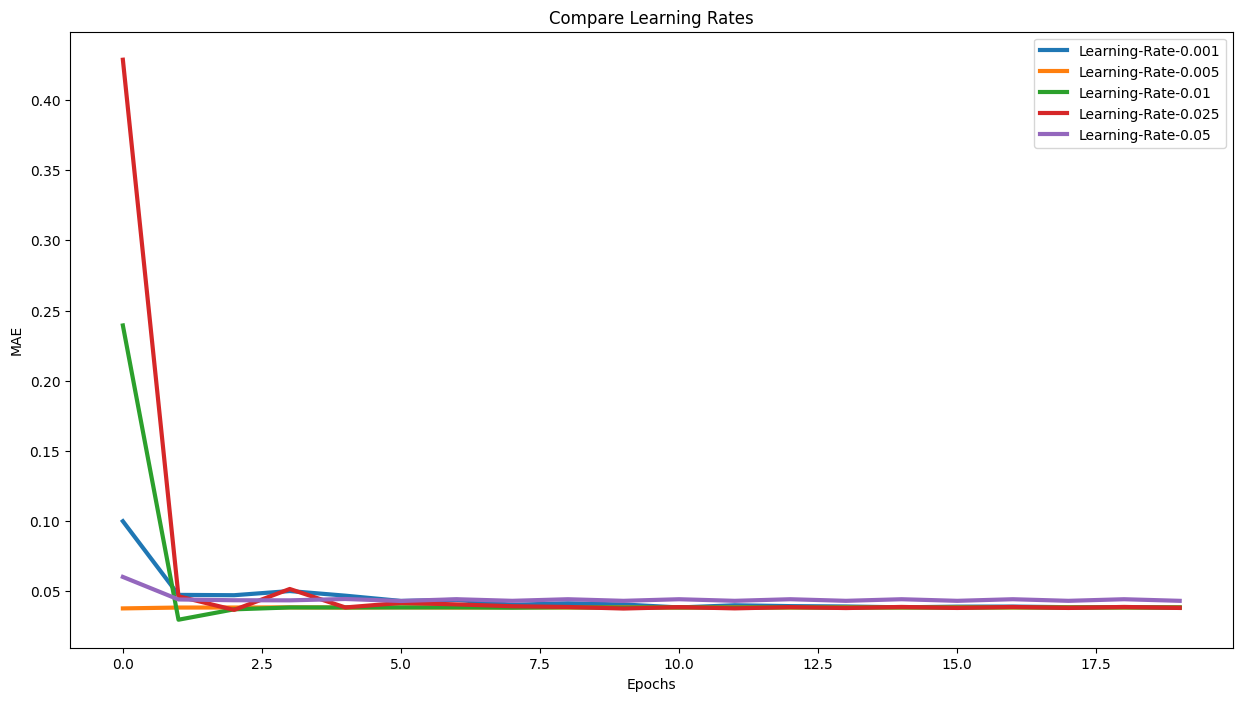

In [194]:
plot_graph(accuracy_measures, "Compare Learning Rates")

## Optimizing Overfitting

### Optimizing Regularization

In [195]:
accuracy_measures = {}

regularizer_list = [None,'l1','l2','l1_l2']
for regularizer in regularizer_list:

    model_config = base_model_config()

    model_config["EPOCHS"]=20
    model_config["BATCH_SIZE"] = 16
    model_config["HIDDEN_NODES"] = [6,6] # gibt auch die Anzahl Hidden Layers an
    model_config["HIDDEN_ACTIVATION"] = 'relu'
    model_config["WEIGHTS_INITIALIZER"] = 'random_normal'
    model_config["OPTIMIZER"]="adam"
    model_config["LEARNING_RATE"] = 0.01

    model_config["REGULARIZER"] = regularizer
    model_name = "Regularizer-" + str(regularizer)
    history, model=create_and_run_model(model_config,x_train,y_train, model_name)

    #Switch to validation accuracy
    accuracy_measures[model_name] = history.history["val_mae"]


******************************************************
Model: "Regularizer-None"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)                 84        
                                                                 
 Dense-Layer-1 (Dense)       (None, 6)                 42        
                                                                 
 Output-Layer (Dense)        (None, 1)                 7         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Regularizer-l1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)          

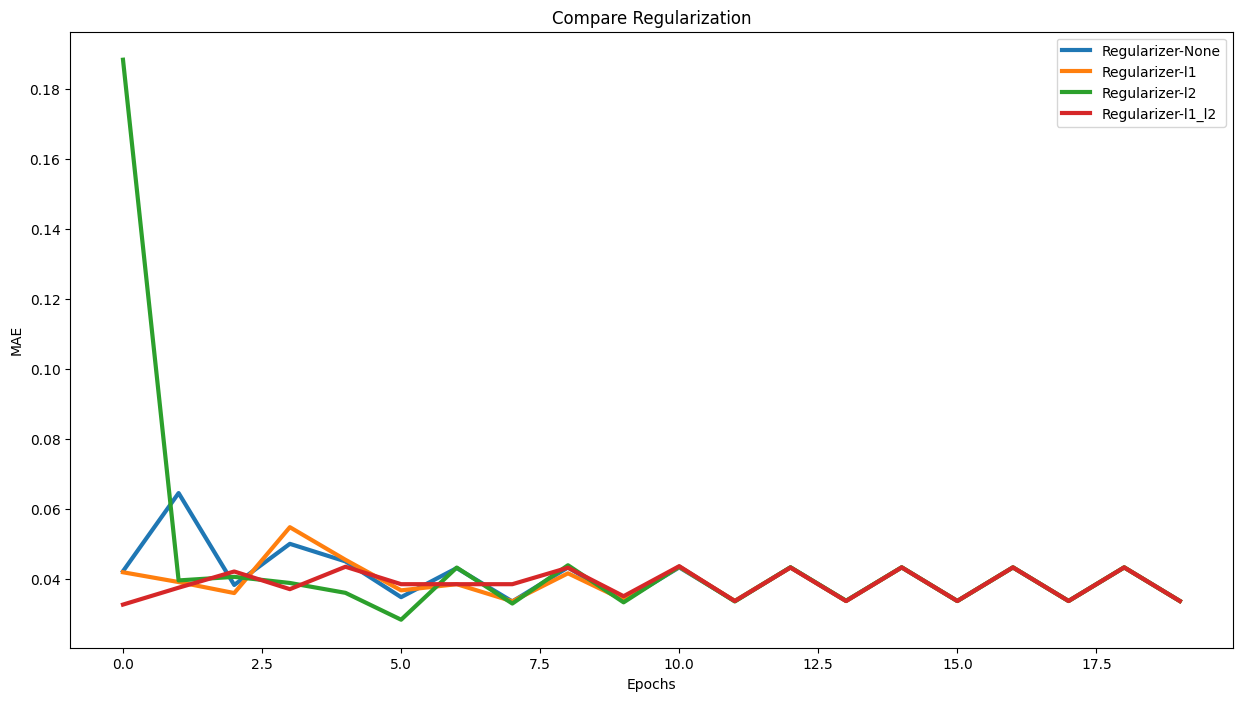

In [196]:
plot_graph(accuracy_measures, "Compare Regularization")

### Optimizing Drop Out

In [197]:
accuracy_measures = {}

dropout_list = [0.0, 0.1, 0.25, 0.5]
best_score = 0
for dropout in dropout_list:

    model_config = base_model_config()

    model_config["EPOCHS"]=20
    model_config["BATCH_SIZE"] = 16
    model_config["HIDDEN_NODES"] = [6,6] # gibt auch die Anzahl Hidden Layers an
    model_config["HIDDEN_ACTIVATION"] = 'relu'
    model_config["WEIGHTS_INITIALIZER"] = 'random_normal'
    model_config["OPTIMIZER"]="adam"
    model_config["LEARNING_RATE"] = 0.01
    model_config["REGULARIZER"] = None

    model_config["DROPOUT_RATE"] = dropout
    model_name="Dropout-" + str(dropout)
    history, model=create_and_run_model(model_config,x_train,y_train, model_name)

    #Using validation accuracy
    accuracy_measures[model_name] = history.history["val_mae"]


******************************************************
Model: "Dropout-0.0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)                 84        
                                                                 
 Dense-Layer-1 (Dense)       (None, 6)                 42        
                                                                 
 Output-Layer (Dense)        (None, 1)                 7         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Dropout-0.1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)                 8

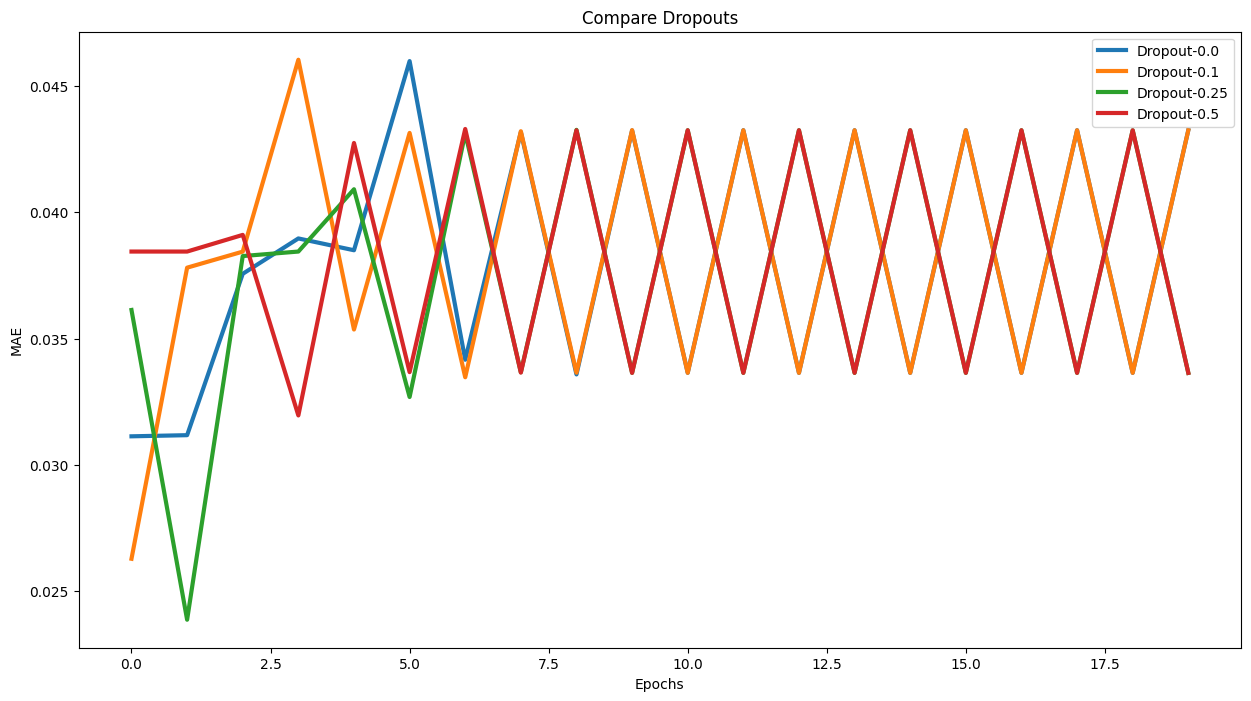

In [198]:
plot_graph(accuracy_measures, "Compare Dropouts")

## FINAL MODEL

In [209]:
accuracy_measures = {}
loss_score = {}
accuracy_score = {}

###Base Minimal Model ####
model_config = base_model_config()
model_config["EPOCHS"]=20
# set hidden nodes to 80
model_config["HIDDEN_NODES"] = [16,16]

model_name = "Base-Model-" + str(layer_count)

history, model=create_and_run_model(model_config,x_train,y_train,model_name)
score = get_score(model,x_test,y_test)

accuracy_measures[model_name] = history.history["mae"]
loss_score[model_name] = score[0]
accuracy_score[model_name] = score[1]

### OPTIMIZED MODEL ####
#Adding all optimizations
model_config = base_model_config()

model_config["EPOCHS"]=20
model_config["BATCH_SIZE"] = 16
model_config["HIDDEN_NODES"] = [6,6] # gibt auch die Anzahl Hidden Layers an
model_config["HIDDEN_ACTIVATION"] = 'relu'
model_config["WEIGHTS_INITIALIZER"] = 'random_normal'
model_config["OPTIMIZER"]="adam"
model_config["LEARNING_RATE"] = 0.01
model_config["REGULARIZER"] = None
model_config["DROPOUT_RATE"] = 0

model_name = "Optimized-Model-" + str(layer_count)

history, model=create_and_run_model(model_config,x_train,y_train,model_name)
score = get_score(model,x_test,y_test)

accuracy_measures[model_name] = history.history["mae"]
loss_score[model_name] = score[0]
accuracy_score[model_name] = score[1]


******************************************************
Model: "Base-Model-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 16)                224       
                                                                 
 Dense-Layer-1 (Dense)       (None, 16)                272       
                                                                 
 Output-Layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________

******************************************************
Model: "Optimized-Model-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 6)           

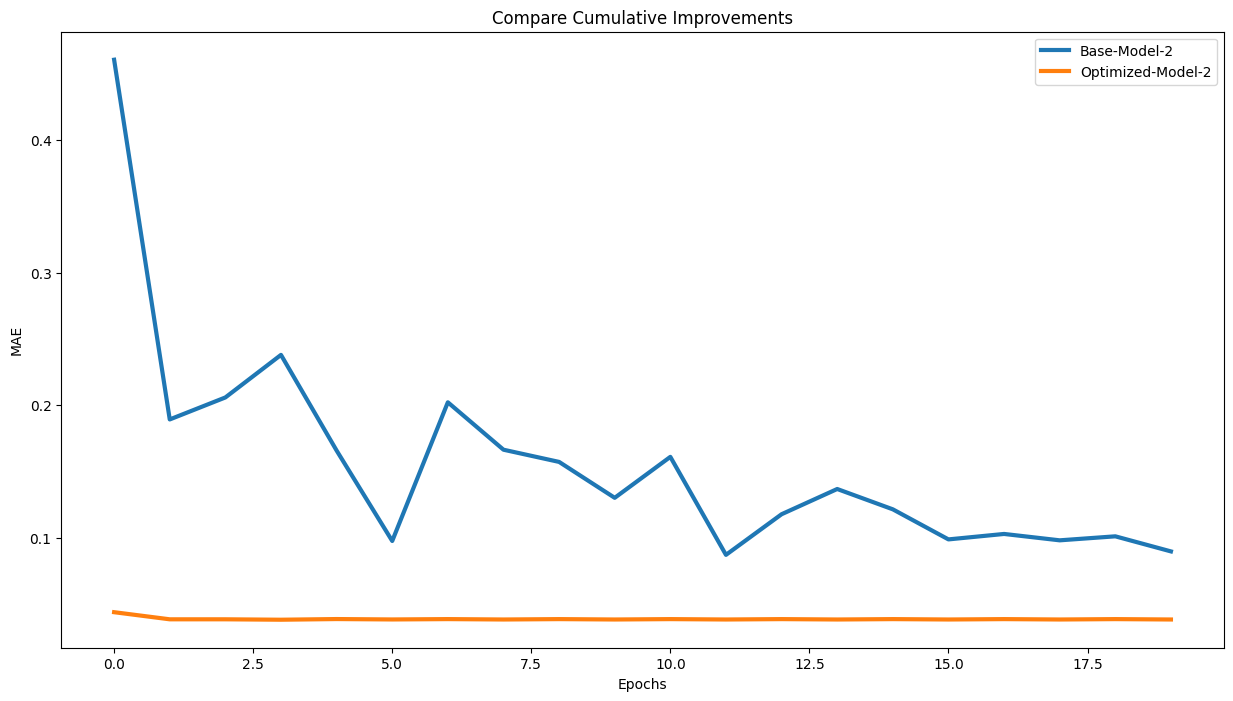

In [210]:
plot_graph(accuracy_measures, "Compare Cumulative Improvements")

In [211]:
loss_score

{'Base-Model-2': 0.03132760897278786,
 'Optimized-Model-2': 0.019248351454734802}

In [212]:
accuracy_score

{'Base-Model-2': 0.09981994330883026, 'Optimized-Model-2': 0.04324827343225479}